<a href="https://colab.research.google.com/github/YuvrajRawat/Anomaly-Detection-In-Social-Media-Network/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load and Preprocess Data
df = pd.read_csv('Tweets.csv')
df = df[['text', 'sentiment']]

# Handle missing values in the "text" column
df['text'].fillna(value='', inplace=True)

train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['sentiment'], test_size=0.2, random_state=42
)

In [ ]:
# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer(stop_words='english')
train_data_vectorized = vectorizer.fit_transform(train_data)
test_data_vectorized = vectorizer.transform(test_data)

# Create the AdaBoost model with DecisionTreeClassifier as base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Train the AdaBoost model on the vectorized training data
adaboost_model.fit(train_data_vectorized, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

Training Accuracy: 1.00
Testing Accuracy: 0.63


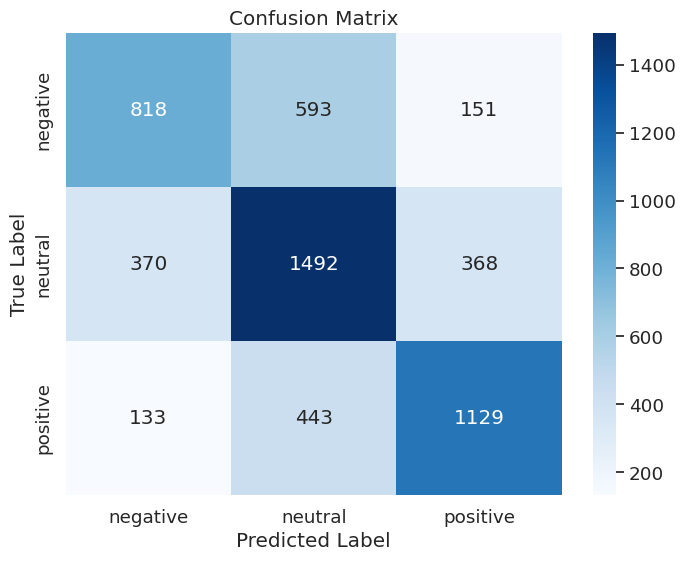

In [ ]:
# Evaluate the Model
train_predictions = adaboost_model.predict(train_data_vectorized)
test_predictions = adaboost_model.predict(test_data_vectorized)

train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Get labels
labels = np.unique(test_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.63
Recall: 0.63
F1 Score: 0.62


In [ ]:
# Make Predictions on Sample Tweets
sample_tweets = ["I`d have responded, if I were going", " Sooo SAD I will miss you here in San Diego!!!", "my boss is bullying me...", " what interview! leave me alone", " Sons of ****, why couldn`t they put them on the releases we already bought"]
true_sentiments = ["neutral", "negative", "negative", "negative", "negative"]

sample_tweets_vectorized = vectorizer.transform(sample_tweets)
predicted_sentiments = adaboost_model.predict(sample_tweets_vectorized)

for tweet, true_sentiment, predicted_sentiment in zip(sample_tweets, true_sentiments, predicted_sentiments):
    print(f'Tweet: {tweet}')
    print(f'True Sentiment: {true_sentiment}')
    print(f'Predicted Sentiment: {predicted_sentiment}')
    print('---')


Tweet: I`d have responded, if I were going
True Sentiment: neutral
Predicted Sentiment: neutral
---
Tweet:  Sooo SAD I will miss you here in San Diego!!!
True Sentiment: negative
Predicted Sentiment: negative
---
Tweet: my boss is bullying me...
True Sentiment: negative
Predicted Sentiment: negative
---
Tweet:  what interview! leave me alone
True Sentiment: negative
Predicted Sentiment: neutral
---
Tweet:  Sons of ****, why couldn`t they put them on the releases we already bought
True Sentiment: negative
Predicted Sentiment: negative
---
